<a href="https://colab.research.google.com/github/Aine449/AI-ML-class-project/blob/main/Detectron2%20_sea_turtle_face_detector_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -qq '/content/drive/MyDrive/Capstone project/IMAGES_1024.zip'

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Capstone project/Train.csv')
#ss = pd.read_csv('/content/SampleSubmission.csv')

In [ ]:
train.head(3)

,Image_ID,x,y,w,h
0,04FB1B33,0.481988,0.506076,0.174696,0.405671
1,B04E481E,0.617405,0.313368,0.177734,0.293113
2,32655645,0.490885,0.465856,0.165582,0.357350


In [ ]:
# Creating a correct 'bbox' column
train['bbox'] = train.apply(lambda row: [row['x'], row['y'], row['w'], row['h']], axis=1)
train.drop(columns=['x', 'y', 'w', 'h'], inplace=True)

In [ ]:
import random

def generate_id():
    return random.choice([0, 1, 2])

# train['id'] = train.apply(lambda _: generate_id(), axis=1)
train['id'] = 0
train['class'] = 2.0

In [ ]:
train.shape

(1326, 4)

In [ ]:
train.head(3)

,Image_ID,bbox,id,class
0,04FB1B33,"[0.4819878472222222, 0.5060763888888888, 0.174...",0,2.0
1,B04E481E,"[0.6174045138888888, 0.3133680555555556, 0.177...",0,2.0
2,32655645,"[0.4908854166666667, 0.4658564814814815, 0.165...",0,2.0


In [ ]:
train['bbox'][0]

[0.4819878472222222,
 0.5060763888888888,
 0.1746961805555555,
 0.4056712962962963]

In [ ]:
i = cv2.imread('/content/IMAGES_1024/00C7A530.JPG')
height, width, _ = i.shape
0.4819878472222222*height

370.16666666666663

In [ ]:
0.9*1326

1193.4

In [ ]:
len(os.listdir('/content/IMAGES_1024'))

2021

In [ ]:
#len(os.listdir(f'{full_path}/IMAGES_1024/IMAGES_1024'))

In [ ]:
[i[:-4] for i in os.listdir('/content/IMAGES_1024')[:4]]

['21CAF130', '8FD27484', 'F094DA63', '7DDC2E3E']

In [ ]:
!mkdir train val

In [ ]:
# print(7)
0.9*2023

1820.7

In [ ]:
%%time
import shutil

n = train.head(1193)

train_ids = random.sample(train['Image_ID'].values.tolist(), 1193) # random sample
val_ids = [i for i in train['Image_ID'].values.tolist() if i not in train_ids]


for f in train_ids:
  shutil.copyfile(f'/content/IMAGES_1024/{f}.JPG', f'/content/train/{f}.JPG')

for f in val_ids:
  shutil.copyfile(f'/content/IMAGES_1024/{f}.JPG', f'/content/val/{f}.JPG')


CPU times: user 42.8 ms, sys: 432 ms, total: 475 ms
Wall time: 543 ms


In [ ]:
len(os.listdir('/content/train')) + len(os.listdir('/content/val'))

1326

In [ ]:
1193 + 133

1326

In [ ]:
# [i for i in train['Image_ID'][:10]]

In [ ]:
# image_ids = ['04FB1B33','B04E481E','32655645','44D4DA7C','4F36EF72','F966A1AC','6F9EE77B',
#              '07A099A6','B62AD85C','C1A5F131']
image_ids = ['04FB1B33','B04E481E','32655645','44D4DA7C']
import json
# Create new_df by filtering df based on 'image_id'
new_df = train[train['Image_ID'].isin(image_ids)]

# Display the new_df
for k in new_df.head().itertuples():
  print(k)
  print(k[2])

Pandas(Index=0, Image_ID='04FB1B33', bbox=[0.4819878472222222, 0.5060763888888888, 0.1746961805555555, 0.4056712962962963], id=0, _4=2.0)
[0.4819878472222222, 0.5060763888888888, 0.1746961805555555, 0.4056712962962963]
Pandas(Index=1, Image_ID='B04E481E', bbox=[0.6174045138888888, 0.3133680555555556, 0.177734375, 0.2931134259259259], id=0, _4=2.0)
[0.6174045138888888, 0.3133680555555556, 0.177734375, 0.2931134259259259]
Pandas(Index=2, Image_ID='32655645', bbox=[0.4908854166666667, 0.4658564814814815, 0.1655815972222222, 0.357349537037037], id=0, _4=2.0)
[0.4908854166666667, 0.4658564814814815, 0.1655815972222222, 0.357349537037037]
Pandas(Index=3, Image_ID='44D4DA7C', bbox=[0.4728732638888889, 0.5060763888888888, 0.2378472222222222, 0.4097222222222222], id=0, _4=2.0)
[0.4728732638888889, 0.5060763888888888, 0.2378472222222222, 0.4097222222222222]


In [ ]:
import numpy as np
import json
import pandas as pd

# path = 'annotations.csv' # the path to the CSV file
# save_json_path = 'traincoco.json'

# Train dataset
train_ids = [i[:-4] for i in os.listdir('/content/train')]
train_df = train[train['Image_ID'].isin(train_ids)]

# Val dataset
val_ids = [i[:-4] for i in os.listdir('/content/val')]
val_df = train[train['Image_ID'].isin(val_ids)]

json_paths = ['/content/train/train.json', '/content/val/val.json']
datas = [train_df, val_df]

for d, path in enumerate(json_paths):

  data = datas[d]

  images = []
  categories = []
  annotations = []

  category = {}
  category["supercategory"] = 'none'
  category["id"] = 0
  category["name"] = 'None'
  categories.append(category)

  data['fileid'] = data['Image_ID'].astype('category').cat.codes
  data['categoryid']= pd.Categorical(data['class'],ordered= True).codes
  data['categoryid'] = data['categoryid']+1
  data['annid'] = data.index

  def image(row):
      image = {}
      im = cv2.imread(f'/content/IMAGES_1024/{row[1]}.JPG')
      height, width, _ = im.shape
      image["height"] = height
      image["width"] = width
      image["id"] = row.fileid
      image["file_name"] = f'/content/IMAGES_1024/{row[1]}.JPG'
      return image

  def category(row):
      category = {}
      category["supercategory"] = 'None'
      category["id"] = row.categoryid
      category["name"] = row[2]
      return category

  def annotation(row):
      annotation = {}
      # area = (row.xmax -row.xmin)*(row.ymax - row.ymin)
#       lst = [row[i] for i in range(2,6)]
#       lst = json.loads(row[2])
      lst = row[2]
      area = lst[2] * lst[3]
      annotation["segmentation"] = []
      annotation["iscrowd"] = 0
      annotation["area"] = area
      annotation["image_id"] = row.fileid

#       xmin, ymin, xmax, ymax = lst[0], lst[1], lst[2], lst[3]
      x, y, w, h = lst[0], lst[1], lst[2], lst[3]


      im2 = cv2.imread(f'/content/IMAGES_1024/{row[1]}.JPG')
      height, width, _ = im2.shape
#       x1, y1, x2, y2 = (x*image_width), (y*image_height), ((x+w)*image_width), ((y+h)*image_height)
#       annotation['bbox'] = [int(x*width), int(y*height), int((x+w)*width),int((y+h)*height)]
      annotation['bbox'] = [int(x*width), int(y*height), int(w*width),int(h*height)]


      annotation["category_id"] = row.categoryid
      annotation["id"] = row.annid
      return annotation

  for row in data.itertuples():
      annotations.append(annotation(row))

  imagedf = data.drop_duplicates(subset=['fileid']).sort_values(by='fileid')
  for row in imagedf.itertuples():
      images.append(image(row))

  catdf = data.drop_duplicates(subset=['categoryid']).sort_values(by='categoryid')
  for row in catdf.itertuples():
      categories.append(category(row))

  data_coco = {}
  data_coco["images"] = images
  data_coco["categories"] = categories
  data_coco["annotations"] = annotations
  json.dump(data_coco, open(path, "w"), indent=4)

<ipython-input-22-c7ccedee844e>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fileid'] = data['Image_ID'].astype('category').cat.codes
<ipython-input-22-c7ccedee844e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['categoryid']= pd.Categorical(data['class'],ordered= True).codes
<ipython-input-22-c7ccedee844e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

**Install Detectron2**

In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 2.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15725, done.
remote: Counting objects: 100% (448/448), done.
remote: Compressing objects: 100% (336/336), done.
remote: Total 15725 (delta 201), reused 302 (delta 103), pack-reused 15277
Receiving objects: 100% (15725/15725), 6.51 MiB | 7.92 MiB/s, done.
Resolving deltas: 100% (11313/11313), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 905.0 kB/s eta 0:

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.3 ; cuda:  cu121
detectron2: 0.6


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

**Run on a pretrained Model**

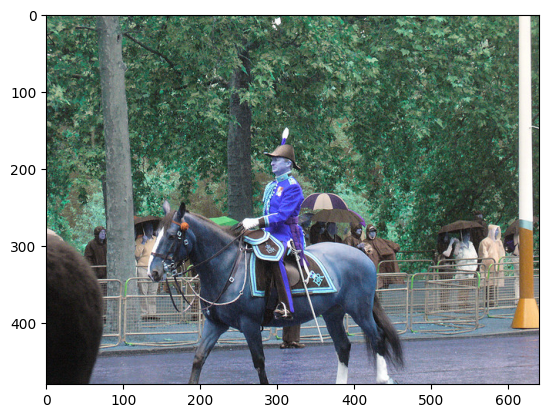

In [ ]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
# cv2_imshow(im)
plt.imshow(im)

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[06/06 04:30:29 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:02, 79.4MB/s]                           
/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([17,  0,  0,  0,  0,  0,  0,  0, 25,  0, 25, 25,  0,  0, 24],
       device='cuda:0')
Boxes(tensor([[126.6035, 244.8977, 459.8291, 480.0000],
        [251.1083, 157.8127, 338.9731, 413.6379],
        [114.8496, 268.6864, 148.2352, 398.8111],
        [  0.8217, 281.0327,  78.6072, 478.4210],
        [ 49.3953, 274.1229,  80.1545, 342.9808],
        [561.2248, 271.5816, 596.2755, 385.2552],
        [385.9072, 270.3125, 413.7130, 304.0397],
        [515.9295, 278.3743, 562.2792, 389.3803],
        [335.2409, 251.9167, 414.7491, 275.9375],
        [350.9300, 269.2060, 386.0984, 297.9081],
        [331.6292, 230.9996, 393.2759, 257.2009],
        [510.7349, 263.2656, 570.9865, 295.9194],
        [409.0841, 271.8646, 460.5582, 356.8722],
        [506.8767, 283.3257, 529.9403, 324.0392],
        [594.5663, 283.4820, 609.0577, 311.4124]], device='cuda:0'))


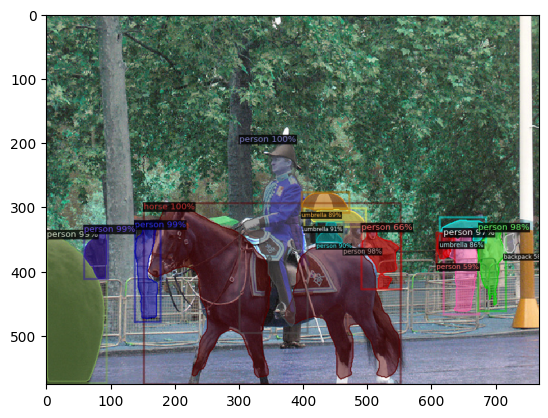

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
# cv2_imshow(out.get_image()[:, :, ::-1])
plt.imshow(out.get_image()[:, :, ::-1])

**Custom Sea Turtle Dataset**

In [ ]:
# from detectron2.data import DatasetCatalog

# dataset_names = ['my_dataset_train', 'my_dataset_val']

# for dataset in dataset_names:
#   if dataset in DatasetCatalog.list():
#       DatasetCatalog.remove(dataset)

In [ ]:
# if your dataset is in COCO format, this cell can be replaced by the following three lines:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/train/train.json", "/content/train")
register_coco_instances("my_dataset_val", {}, "/content/val/val.json", "/content/val")

In [ ]:
# DatasetCatalog.get("my_dataset_train")

In [ ]:
train_metadata = MetadataCatalog.get("my_dataset_train")
train_dataset_dicts = DatasetCatalog.get("my_dataset_train")

WARNING [06/06 04:30:50 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/06 04:30:50 d2.data.datasets.coco]: Loaded 1193 images in COCO format from /content/train/train.json


In [ ]:
val_metadata = MetadataCatalog.get("my_dataset_val")
val_dataset_dicts = DatasetCatalog.get("my_dataset_val")

WARNING [06/06 04:30:52 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/06 04:30:52 d2.data.datasets.coco]: Loaded 133 images in COCO format from /content/val/val.json


In [ ]:
val_dataset_dicts[0]
# train_metadata

{'file_name': '/content/IMAGES_1024/0176A48A.JPG',
 'height': 768,
 'width': 1024,
 'image_id': 0,
 'annotations': [{'iscrowd': 0,
   'bbox': [356, 334, 398, 298],
   'category_id': 1,
   'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}

In [ ]:
del train_metadata.thing_classes
del val_metadata.thing_classes

In [ ]:
# MetadataCatalog.get(cfg.DATASETS.TEST[0])

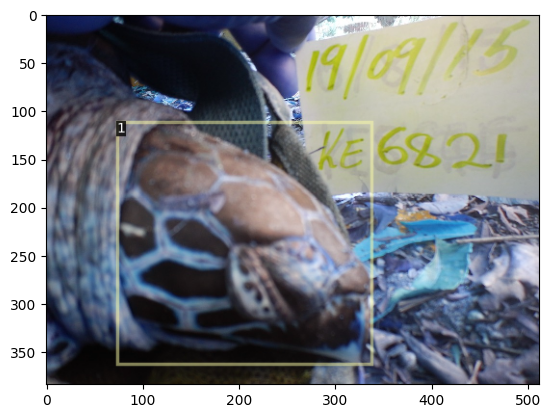

In [ ]:
# from detectron2.structures import BitMasks, Boxes, BoxMode, Keypoints, PolygonMasks, RotatedBoxes
m = train_dataset_dicts[57]
annos = m.get('annotations')
img = cv2.imread(f'{m["file_name"]}')
visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)
vis = visualizer.draw_dataset_dict(m)
plt.imshow(vis.get_image()[:, :, ::-1])


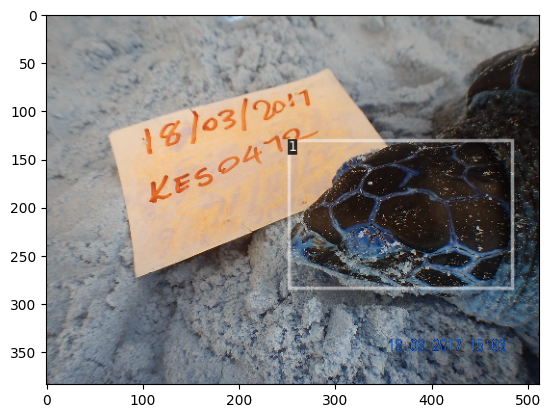

In [ ]:
#visualize training data
# my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
# dataset_dicts = DatasetCatalog.get("my_dataset_train")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(train_dataset_dicts, 3):
    img = cv2.imread(f'{d["file_name"]}')
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)
#     print(d)
    vis = visualizer.draw_dataset_dict(d)
#     print(vis.shape[0])

# #     cv2_imshow(vis.get_image()[:, :, ::-1])
    plt.imshow(vis.get_image()[:, :, ::-1])

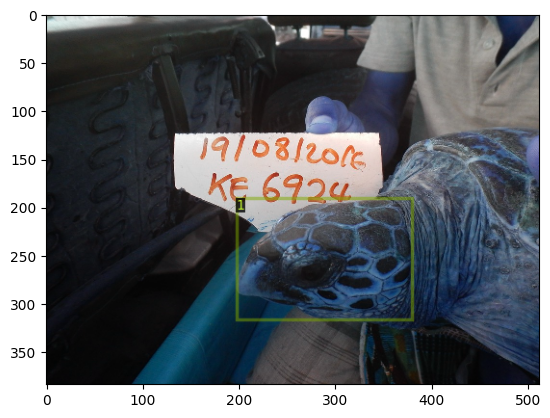

In [ ]:
#visualize training data
# my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
# dataset_dicts = DatasetCatalog.get("my_dataset_train")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(train_dataset_dicts, 3):
    img = cv2.imread(f'{d["file_name"]}')
    # print(d['file_name'])
    # print(img)
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)
    # print(d['annotations'][0]['bbox'][0])
    # print(d.get('file_name'))
    # print(visualizer)
    # visualizer.draw_dataset_dict()
    vis = visualizer.draw_dataset_dict(d)
    # cv2_imshow(vis.get_image()[:, :, ::-1])
    plt.imshow(vis.get_image()[:, :, ::-1])

**Model Training**

In [ ]:
%%time
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
#cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
# 'COCO-Detection/fast_rcnn_R_50_FPN_1x.yaml'
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)
cfg.TEST.EVAL_PERIOD = 100
cfg.DATALOADER.NUM_WORKERS = 2
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 3
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR 0.00025
cfg.SOLVER.MAX_ITER = 100    # 3000 iterations seems good enough
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 6   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6  # only has one class (ballon)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


[06/06 04:31:36 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_68b088.pkl: 421MB [00:01, 238MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[06/06 04:31:39 d2.engine.train_loop]: Starting training from iteration 0
[06/06 04:32:38 d2.utils.events]:  eta: 0:03:58  iter: 19  total_loss: 2.61  loss_cls: 1.894  loss_box_reg: 0.7079  loss_rpn_cls: 0.02496  loss_rpn_loc: 0.007559    time: 2.8989  last_time: 2.6356  data_time: 0.0347  last_data_time: 0.0085   lr: 4.7703e-05  max_mem: 8999M
[06/06 04:33:40 d2.utils.events]:  eta: 0:02:52  iter: 39  total_loss: 1.634  loss_cls: 1.029  loss_box_reg: 0.5755  loss_rpn_cls: 0.04743  loss_rpn_loc: 0.008742    time: 2.9096  last_time: 3.1369  data_time: 0.0300  last_data_time: 0.0490   lr: 9.7653e-05  max_mem: 8999M
[06/06 04:34:39 d2.utils.events]:  eta: 0:01:59  iter: 59  total_loss: 1.211  loss_cls: 0.473  loss_box_reg: 0.7176  loss_rpn_cls: 0.01807  loss_rpn_loc: 0.006777    time: 2.9250  last_time: 2.7763  data_time: 0.0225  last_data_time: 0.0084   lr: 0.0001476  max_mem: 8999M
[06/06 04:35:37 d2.utils.events]:  eta: 0:00:57  iter: 79  total_loss: 0.9474  loss_cls: 0.305  loss_box_r

In [ ]:
# print('DONE! DC5 5000 iters')

In [ ]:
# !pip install tensorflow tensorboard

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.callbacks import TensorBoard

In [ ]:
# Activate inline tensorboard extension
# %load_ext tensorboard

In [ ]:
# run tensorboad in the notebook try using with and without %sign
# %tensorboard --logdir=./logs

**Inference using the Trained Model**

In [ ]:
cfg.OUTPUT_DIR

'./output'

In [ ]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

[06/06 05:00:19 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


Then, we randomly select several samples to visualize the prediction results.

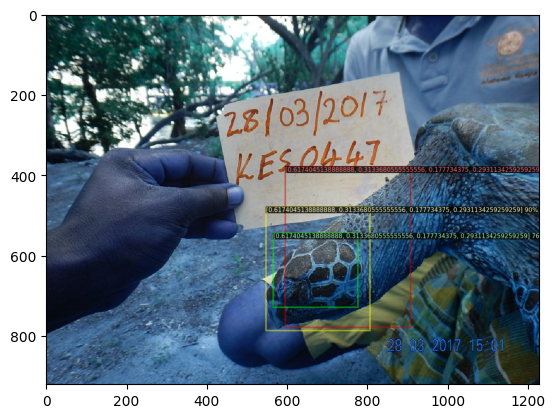

In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(val_dataset_dicts, 1):    #select number of images for display
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=val_metadata,
                   scale=1.2
                  #  instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    # print(outputs)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.imshow(out.get_image()[:, :, ::-1])

We can also evaluate its performance using AP metric implemented in COCO API.

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_dataset_val", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "my_dataset_val")
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

[06/06 05:00:39 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [06/06 05:00:39 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/06 05:00:39 d2.data.datasets.coco]: Loaded 133 images in COCO format from /content/val/val.json
[06/06 05:00:39 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[06/06 05:00:39 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[06/06 05:00:39 d2.data.common]: Serializing 133 elements to byte tensors and concatenating them all ...
[06/06 05:00:39 d2.data.common]: Serialized dataset takes 0.03 MiB
[06/06 05:00:39 d2.evaluation.evaluator]: Start inference on 133 batches


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[06/06 05:00:42 d2.evaluation.evaluator]: Inference done 11/133. Dataloading: 0.0028 s/iter. Inference: 0.2509 s/iter. Eval: 0.0003 s/iter. Total: 0.2540 s/iter. ETA=0:00:30
[06/06 05:00:47 d2.evaluation.evaluator]: Inference done 30/133. Dataloading: 0.0062 s/iter. Inference: 0.2546 s/iter. Eval: 0.0004 s/iter. Total: 0.2613 s/iter. ETA=0:00:26
[06/06 05:00:52 d2.evaluation.evaluator]: Inference done 49/133. Dataloading: 0.0054 s/iter. Inference: 0.2570 s/iter. Eval: 0.0004 s/iter. Total: 0.2629 s/iter. ETA=0:00:22
[06/06 05:00:58 d2.evaluation.evaluator]: Inference done 69/133. Dataloading: 0.0043 s/iter. Inference: 0.2579 s/iter. Eval: 0.0003 s/iter. Total: 0.2627 s/iter. ETA=0:00:16
[06/06 05:01:03 d2.evaluation.evaluator]: Inference done 88/133. Dataloading: 0.0048 s/iter. Inference: 0.2581 s/iter. Eval: 0.0004 s/iter. Total: 0.2635 s/iter. ETA=0:00:11
[06/06 05:01:08 d2.evaluation.evaluator]: Inference done 107/133. Dataloading: 0.0052 s/iter. Inference: 0.2590 s/iter. Eval: 0.00

In [ ]:
ss.head()

,Image_ID,x,y,w,h
0,4863D911,0,0,0,0
1,6DD3ADD5,0,0,0,0
2,E8DC4D6A,0,0,0,0
3,E02ABB6C,0,0,0,0
4,875C19F4,0,0,0,0


**Submitting**

In [ ]:
sub = ss.copy()
# sub.head()

In [ ]:
%%time
for i, row in sub.iterrows():
#     row['Image_ID'])
    tst = cv2.imread(f"/content/IMAGES_1024/{row['Image_ID']}.JPG")
    img_h, img_w, _ = tst.shape
    outputs = predictor(tst)
    ans = outputs['instances'].to('cpu')
    scores = ans.scores.cpu().numpy()
    val = ans.pred_boxes.tensor.cpu().numpy()[0]

    x, y = val[0]/img_w, val[1]/img_h
    w = val[2]/img_w-x
    h = val[3]/img_h-y
    sub.at[i, 'x'] = x
    sub.at[i, 'y'] = y
    sub.at[i, 'w'] = w
    sub.at[i, 'h'] = h



CPU times: user 3min 10s, sys: 446 ms, total: 3min 10s
Wall time: 3min 14s


In [ ]:
sub.head()

,Image_ID,x,y,w,h
0,4863D911,0.175105,0.283890,0.585535,0.522738
1,6DD3ADD5,0.328671,0.306876,0.376781,0.479068
2,E8DC4D6A,0.364073,0.527598,0.440102,0.426584
3,E02ABB6C,0.335455,0.537026,0.402214,0.390717
4,875C19F4,0.365210,0.460763,0.401256,0.405802


In [ ]:
sub.to_csv('frcnn_X_101_32x8d_FPN_3x_3k.csv', index=False)

In [ ]:
import pandas as pd
cols = ['Image_ID', 'x', 'y', 'w', 'h']
dat = pd.DataFrame(columns=cols)


new_data = []
x_vals, y_vals, w_vals, h_vals = [], [], [], []
for i in ss['Image_ID']:
#     print(i)
    tst = cv2.imread(f"/content/IMAGES_512/IMAGES_512/{i}.JPG")
#     print(tst)
    img_h, img_w, _ = tst.shape
    outputs = predictor(tst)
    ans = outputs['instances'].to('cpu')
    # print(ans)
    scores = ans.scores.cpu().numpy()
#     val = ans.pred_boxes.tensor.cpu().numpy()[np.argmax(scores)]
    val = ans.pred_boxes.tensor.cpu().numpy()[0]

    x, y = val[0]/img_w, val[1]/img_h
    w = val[2]/img_w-x
    h = val[3]/img_h-y
#     print('------', i, '-------')
#     print(scores, len(scores), i, x, y, w, h)

#     if scores:
#         print(scores, x, y, w, h)
#     else:
#         print('NOT detected')
#     x_vals.append(new_lst[0])
#     y_vals.append(new_lst[1])
#     w_vals.append(new_lst[2])
#     h_vals.append(new_lst[3])

#     df['x'], df['y'], df['w'], df['h'] = new_lst[0], new_lst[1], new_lst[2], new_lst[3]

    new_data.append({'Image_ID': f'{i}', 'x': x,
                    'y': y, 'w': w, 'h': h})

dat = pd.concat([dat, pd.DataFrame(new_data)], ignore_index=True)
#     print(new_lst)

CPU times: user 2min 18s, sys: 272 ms, total: 2min 18s
Wall time: 2min 14s


<timed exec>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [ ]:
np.argmax([0.99847287, 0.8904003 ])

0

In [ ]:
# COCO-Detection/faster_rcnn_R_50_DC5_3x.yaml
tst = cv2.imread(f"/content/IMAGES_512/IMAGES_512/D627C3BD.JPG")
#     print(tst)
img_h, img_w, _ = tst.shape
outputs = predictor(tst)
ans = outputs['instances'].to('cpu')
# print(ans)
scores = ans.scores.cpu().numpy()
val = ans.pred_boxes.tensor.cpu().numpy()[np.argmax(scores)]
x, y = val[0]/img_w, val[1]/img_h
w = val[2]/img_w-x
h = val[3]/img_h-y
print(val, x, y, w, h)

[174.74428 185.81195 323.2021  267.623  ] 0.3412974178791046 0.4838852882385254 0.289956659078598 0.213049570719401


In [ ]:
dat.head()

,Image_ID,x,y,w,h
0,4863D911,0.189365,0.275634,0.576645,0.556028
1,6DD3ADD5,0.338457,0.308322,0.362205,0.459293
2,E8DC4D6A,0.364476,0.530279,0.438123,0.412603
3,E02ABB6C,0.333744,0.535261,0.416565,0.396468
4,875C19F4,0.372161,0.457758,0.398794,0.397769


In [ ]:
dat.to_csv('frcnn_R_50_DC5_3x_5k.csv', index=False)

In [ ]:
# ss.tail()
# t = cv2.imread(f'{full_path}/IMAGES_512/IMAGES_512/846134F3.JPG')
# plt.imshow(t)
ss[ss['Image_ID'] == '846134F3']

,Image_ID,x,y,w,h
390,846134F3,0,0,0,0


In [ ]:
%%time
import pandas as pd
cols = ['image_id', 'Target']
dat = pd.DataFrame(columns=cols)

new_data = []
for i in test_csv['image_id']:
    im4 = cv2.imread(f'/kaggle/input/arm-unicef-disaster-vulnerability-challenge/Images/{i}.tif')
    outputs = best_predictor(im4)
    ans = outputs['instances'].to("cpu").pred_classes.tolist()
    for k in range(1, 4):
        new_data.append({'image_id': f'{i}_{k}', 'Target': ans.count(k)})
dat = pd.concat([dat, pd.DataFrame(new_data)], ignore_index=True)

# Make sure to adjust the code according to your specific requirements and data structures.

,Image_ID,x,y,w,h
0,4863D911,0,0,0,0
1,6DD3ADD5,0,0,0,0
2,E8DC4D6A,0,0,0,0
3,E02ABB6C,0,0,0,0
4,875C19F4,0,0,0,0


In [ ]:
tst = cv2.imread(f"/content/IMAGES_512/IMAGES_512/{ss['Image_ID'][0]}.JPG")
h, w, _ = tst.shape
outputs = predictor(tst)
ans = outputs['instances'].to('cpu')
# print(ans)
val = ans.pred_boxes.tensor.cpu().numpy()[0]

# annotation['bbox'] = [int(x*width), int(y*height), int(w*width),int(h*height)]
new_lst = [val[0]/w, val[1]/h, val[2]/w, val[3]/h]
print(new_lst)

[0.19869446754455566, 0.27021485567092896, 0.7601472735404968, 0.8210628827412924]
